In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
drivers = pd.read_csv('D:\Data_Science_Documents\Formula_one\data_files\drivers.csv')
driver_standings = pd.read_csv('D:\Data_Science_Documents\Formula_one\data_files\driver_standings.csv')
races =  pd.read_csv('D:\\Data_Science_Documents\\Formula_one\data_files\\races.csv')
teams = pd.read_csv('D:\Data_Science_Documents\Formula_one\data_files\constructors.csv')

Drivers Data Cleaning

In [3]:
drivers.drop(columns=['url', 'dob', 'nationality'], inplace=True)

Races Data Cleaning

In [4]:
races.drop(columns=['url', 'fp1_date', 'fp1_time', 'fp1_date','fp1_time','fp2_date','fp2_time','fp3_date','fp3_time','quali_date','quali_time','sprint_date','sprint_time'], inplace=True)

All 2022 Races

In [5]:
races = races[races['year'] == 2022]

Driver standings for only the races in 2022

In [6]:
driver_standings =  driver_standings[driver_standings['raceId'].isin(races['raceId'])]

replacing driver IDs with the names

In [7]:
driver_ids = driver_standings['driverId'].unique()

In [8]:
driver_ids

array([842, 830, 815, 807, 849, 846, 817, 848, 840, 854, 855,   4, 852,
       839, 822, 844, 832,   1, 847, 825,  20, 856], dtype=int64)

In [9]:
driver_names = drivers[drivers['driverId'].isin(driver_ids)].set_index('driverId')['code'].to_dict()

In [10]:
driver_standings['Name'] = driver_standings['driverId'].replace(driver_names)

Adding the race Name based on race id

In [11]:
race_names = races.set_index('raceId')['name'].to_dict()

In [12]:
driver_standings['Race Name'] = driver_standings['raceId'].replace(race_names)

In [13]:
driver_standings.reset_index(inplace=True)

In [14]:
driver_standings.sort_values(by='raceId')

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name
0,33374,71395,1074,842,0.0,20,20,0,GAS,Bahrain Grand Prix
19,33434,71380,1074,825,10.0,5,5,0,MAG,Bahrain Grand Prix
18,33433,71379,1074,847,12.0,4,4,0,RUS,Bahrain Grand Prix
17,33432,71378,1074,1,15.0,3,3,0,HAM,Bahrain Grand Prix
16,33431,71377,1074,832,18.0,2,2,0,SAI,Bahrain Grand Prix
...,...,...,...,...,...,...,...,...,...,...
336,33751,71629,1091,832,202.0,5,5,1,SAI,Singapore Grand Prix
335,33750,71628,1091,844,237.0,2,2,3,LEC,Singapore Grand Prix
355,33770,71648,1091,20,24.0,12,12,0,VET,Singapore Grand Prix
344,33759,71637,1091,855,6.0,18,18,0,ZHO,Singapore Grand Prix


In [15]:
driver_teams = {
    'NOR' : 'darkorange', 
    'RIC' : 'darkorange', 
    'VER' : 'darkblue', 
    'PER' : 'darkblue', 
    'LEC' : 'red', 
    'SAI' : 'red',
    'RUS' : 'mediumaquamarine', 
    'HAM' : 'mediumaquamarine', 
    'MAG' : 'snow', 
    'MSC' : 'snow', 
    'ALB' : 'dodgerblue', 
    'LAT' : 'dodgerblue', 
    'DEV' : 'dodgerblue', 
    'GAS' : 'gray', 
    'TSU' : 'gray', 
    'ALO' : 'mediumblue', 
    'OCO' : 'mediumblue', 
    'HUL' : 'darkgreen',
    'VET' : 'darkgreen', 
    'STR' : 'darkgreen', 
    'BOT' : 'darkred',
    'ZHO' : 'darkred'}

In [16]:
driver_standings

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name
0,33374,71395,1074,842,0.0,20,20,0,GAS,Bahrain Grand Prix
1,33375,71394,1074,830,0.0,19,19,0,VER,Bahrain Grand Prix
2,33376,71393,1074,815,0.0,18,18,0,PER,Bahrain Grand Prix
3,33377,71392,1074,807,0.0,17,17,0,HUL,Bahrain Grand Prix
4,33378,71391,1074,849,0.0,16,16,0,LAT,Bahrain Grand Prix
...,...,...,...,...,...,...,...,...,...,...
352,33767,71645,1091,815,235.0,3,3,2,PER,Singapore Grand Prix
353,33768,71646,1091,830,341.0,1,1,11,VER,Singapore Grand Prix
354,33769,71647,1091,842,23.0,13,13,0,GAS,Singapore Grand Prix
355,33770,71648,1091,20,24.0,12,12,0,VET,Singapore Grand Prix


In [17]:
driver_standings['Team'] = driver_standings['Name'].replace(driver_teams)

In [18]:
driver_standings

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name,Team
0,33374,71395,1074,842,0.0,20,20,0,GAS,Bahrain Grand Prix,gray
1,33375,71394,1074,830,0.0,19,19,0,VER,Bahrain Grand Prix,darkblue
2,33376,71393,1074,815,0.0,18,18,0,PER,Bahrain Grand Prix,darkblue
3,33377,71392,1074,807,0.0,17,17,0,HUL,Bahrain Grand Prix,darkgreen
4,33378,71391,1074,849,0.0,16,16,0,LAT,Bahrain Grand Prix,dodgerblue
...,...,...,...,...,...,...,...,...,...,...,...
352,33767,71645,1091,815,235.0,3,3,2,PER,Singapore Grand Prix,darkblue
353,33768,71646,1091,830,341.0,1,1,11,VER,Singapore Grand Prix,darkblue
354,33769,71647,1091,842,23.0,13,13,0,GAS,Singapore Grand Prix,gray
355,33770,71648,1091,20,24.0,12,12,0,VET,Singapore Grand Prix,darkgreen


In [19]:
grouped = driver_standings.groupby(['Team','raceId'])

In [20]:
driver_teams = {
    'NOR' : 'darkorange', 
    'RIC' : 'darkorange', 
    'VER' : 'darkblue', 
    'PER' : 'darkblue', 
    'LEC' : 'red', 
    'SAI' : 'red',
    'RUS' : 'mediumaquamarine', 
    'HAM' : 'mediumaquamarine', 
    'MAG' : 'snow', 
    'MSC' : 'snow', 
    'ALB' : 'dodgerblue', 
    'LAT' : 'dodgerblue', 
    'DEV' : 'dodgerblue', 
    'GAS' : 'gray', 
    'TSU' : 'gray', 
    'ALO' : 'mediumblue', 
    'OCO' : 'mediumblue', 
    'HUL' : 'darkgreen',
    'VET' : 'darkgreen', 
    'STR' : 'darkgreen', 
    'BOT' : 'darkred',
    'ZHO' : 'darkred'}

In [21]:
driver_standings['Name']

0      GAS
1      VER
2      PER
3      HUL
4      LAT
      ... 
352    PER
353    VER
354    GAS
355    VET
356    DEV
Name: Name, Length: 357, dtype: object

c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


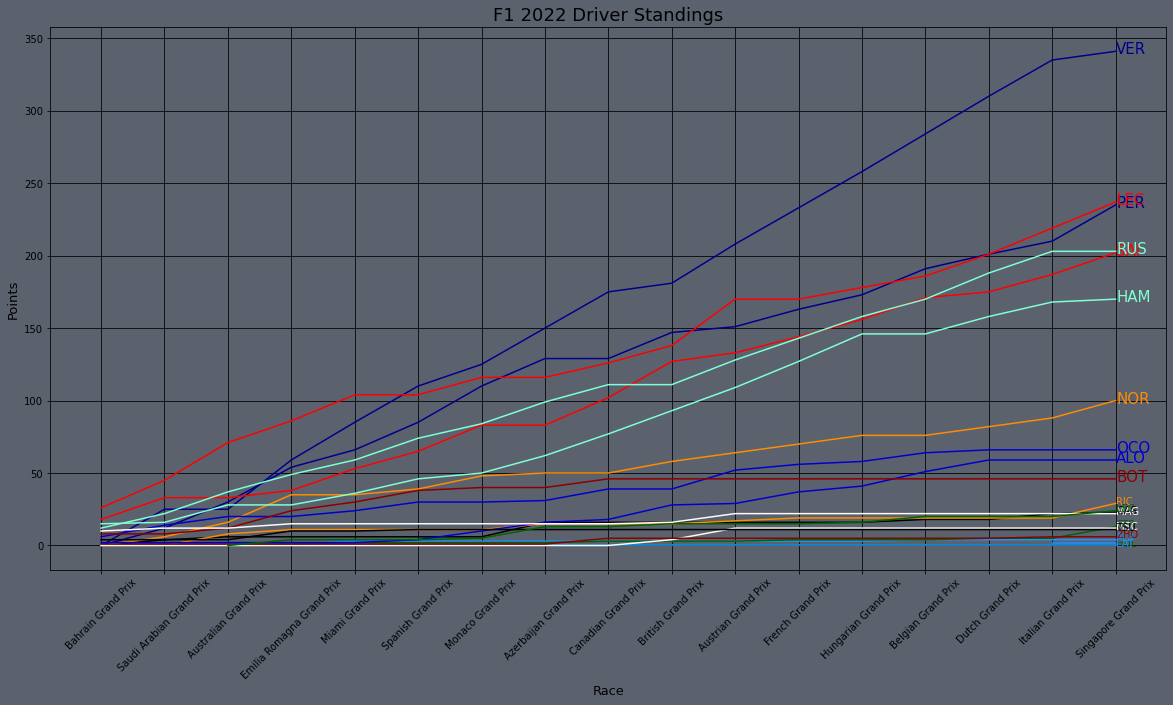

In [22]:

fig =  plt.figure( figsize=(20,10))

colors=['black', 'darkblue', 'darkblue', 'darkgreen', 'dodgerblue', 'darkorange','darkorange', 'dodgerblue','darkgreen','snow',
'darkred','mediumblue','black','mediumblue','darkred','red','red','aquamarine','aquamarine','snow','darkgreen','dodgerblue']

ax = sns.lineplot(driver_standings['Race Name'], driver_standings['points'],palette=colors,hue=driver_standings['Name'], markers='o')



fig.set_facecolor('#5b626e')
ax.set_facecolor('#5b626e')


plt.xticks(rotation=45)

legend = plt.legend(loc=(1, .42))
frame = legend.get_frame()
frame.set_facecolor('#5b626e')
frame.set_edgecolor('black')
plt.title('F1 2022 Driver Standings', fontsize=18)
plt.ylabel('Points', fontsize=13)
plt.xlabel('Race', fontsize=13)
plt.legend().set_visible(False)
x = 0
for line, name in zip(ax.lines, driver_standings['Name']):
    y = line.get_ydata()[-1]
    if y <= 45:
        ax.annotate(name, xy=(1,y), xytext=(-50,2), color=line.get_color(), 
                    xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                    size=10, va="center")
    else:
        ax.annotate(name, xy=(1,y), xytext=(-50,2), color=line.get_color(), 
                    xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                    size=15, va="center")
    x+=1
    if x >= 21:
        break



plt.grid(color ='black')
plt.show()

In [23]:
last_most_race = driver_standings['raceId'].unique()[-1]

In [24]:
driverids = driver_standings[(driver_standings['raceId'] == last_most_race) & (driver_standings['points'] <= 35)]['driverId']

In [25]:
driver_standings2 = driver_standings[driver_standings['driverId'].isin(driverids)]

In [26]:
driver_standings2[driver_standings2['raceId'] == last_most_race]

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name,Team
339,33754,71632,1091,825,22.0,14,14,0,MAG,Singapore Grand Prix,snow
342,33757,71635,1091,852,11.0,17,17,0,TSU,Singapore Grand Prix,gray
344,33759,71637,1091,855,6.0,18,18,0,ZHO,Singapore Grand Prix,darkred
345,33760,71638,1091,854,12.0,16,16,0,MSC,Singapore Grand Prix,snow
346,33761,71639,1091,840,13.0,15,15,0,STR,Singapore Grand Prix,darkgreen
347,33762,71640,1091,848,4.0,19,19,0,ALB,Singapore Grand Prix,dodgerblue
348,33763,71641,1091,817,29.0,11,11,0,RIC,Singapore Grand Prix,darkorange
350,33765,71643,1091,849,0.0,21,21,0,LAT,Singapore Grand Prix,dodgerblue
351,33766,71644,1091,807,0.0,22,22,0,HUL,Singapore Grand Prix,darkgreen
354,33769,71647,1091,842,23.0,13,13,0,GAS,Singapore Grand Prix,gray


In [27]:
dev_add = {
    'driverStandingsId' : 00000,
    'raceId' : 1088,
    'driverId': 856,	
    'points':0,
    'position':22,
    'positionText' : '22',
    'wins' : 0,
    'Name'	: 'DEV', 
    'Race Name' : 'Dutch Grand Prix',
    'Team': 'dodgerblue'}

In [28]:
blank = pd.DataFrame(columns=driver_standings2.columns[0:])
blank.append(dev_add,ignore_index=True)

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name,Team
0,NaN,0,1088,856,0,22,22,0,DEV,Dutch Grand Prix,dodgerblue


In [29]:
driver_standings2 = blank.append(driver_standings2, ignore_index=True)

c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


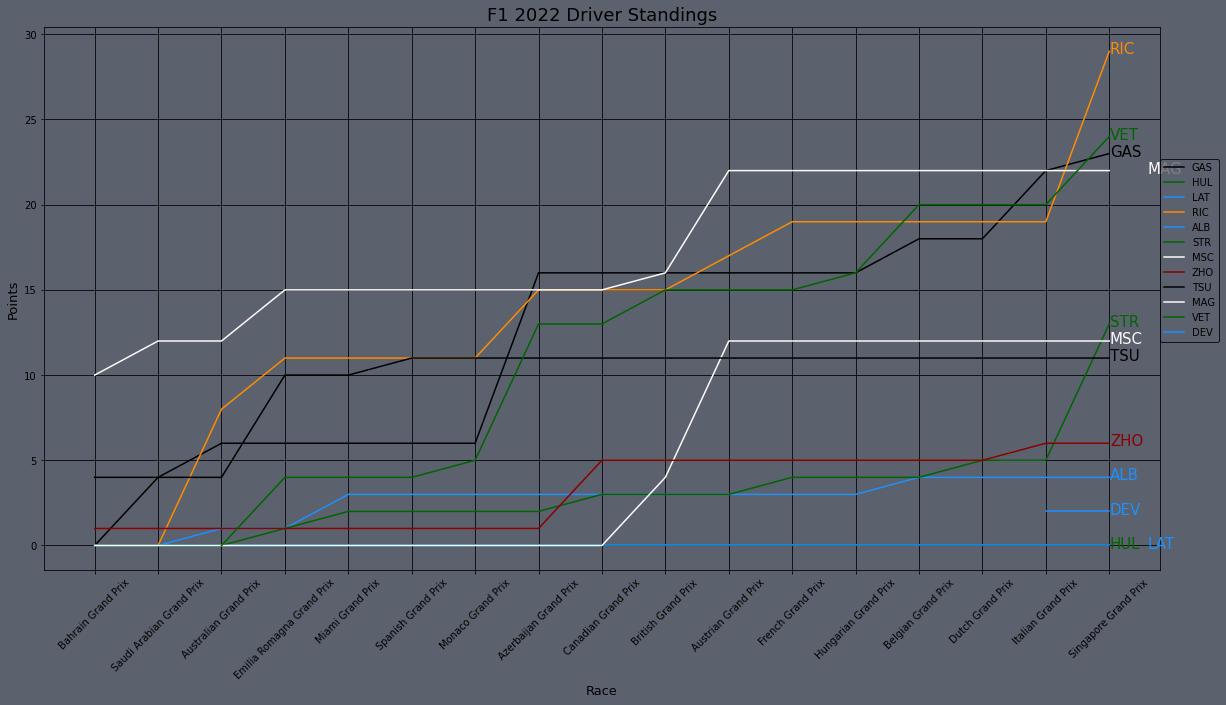

In [30]:

fig =  plt.figure( figsize=(20,10))

colors=['black', 'darkgreen', 'dodgerblue','darkorange', 'dodgerblue','darkgreen','snow',
'darkred','black','snow','darkgreen','dodgerblue']

ax = sns.lineplot(driver_standings2['Race Name'], driver_standings2['points'],palette=colors,hue=driver_standings2['Name'], markers='o')



fig.set_facecolor('#5b626e')
ax.set_facecolor('#5b626e')


plt.xticks(rotation=45)

legend = plt.legend(loc=(1, .42))
frame = legend.get_frame()
frame.set_facecolor('#5b626e')
frame.set_edgecolor('black')
plt.title('F1 2022 Driver Standings', fontsize=18)
plt.ylabel('Points', fontsize=13)
plt.xlabel('Race', fontsize=13)




x = 0
for line, name in zip(ax.lines, driver_standings2['Name']):
    #print(name)
    if name=='MAG' and x >9:
        name='VET'

    if name=='TSU' and x >10:
        name='DEV'

    y = line.get_ydata()[-1]
    if name == 'LAT':
        ax.annotate(name, xy=(1,y), xytext=(-12,2), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=15, va="center")
    if name == 'MAG':
        ax.annotate(name, xy=(1,y), xytext=(-12,2), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=15, va="center")
    if name != 'LAT' and name != 'MAG':
        ax.annotate(name, xy=(1,y), xytext=(-50,2), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=15, va="center")

    x+=1
    if x >= 12:
        break

#plt.legend().set_visible(False)
plt.grid(color ='black')
plt.show()